
# TPM034A Machine Learning for socio-technical systems
## `Assignment 02: Artificial Neural Networks`

**Delft University of Technology**<br>
**Q2 2022**<br>
**Instructor:** Sander van Cranenburgh <br>
**TAs:**  Francisco Garrido Valenzuela & Lucas Spierenburg <br>

### `Instructions`

**Assignments aim to:**<br>
* Examine your understanding of the key concepts and techniques.
* Examine your the applied ML skills.

**Assignments:**<br>
* Are graded and must be submitted (see the submission instruction below). 

### `Workspace set-up`
**Option 1: Google Colab**<br>
Uncomment the following cells code lines if you are running this notebook on Colab

In [ ]:
#!git clone https://github.com/TPM34A/Q2_2022
#!pip install -r Q2_2022/requirements_colab.txt
#!mv "/content/Q2_2022/Assignments/assignment_02/data" /content/data

**Option 2: Local environment**<br>
Uncomment the following cell if you are running this notebook on your local environment. This will install all dependencies on your Python version.

In [ ]:
#!pip install -r requirements.txt

## `Application: Predicting the effects of a car ban in the city centre of Leeds` <br>

### **Introduction**
The city of Leeds, in the United Kingdom, is considering implementing a ban on private cars in the city center. Nowadays, car-free city centres are increasingly popular in Western European countries. As cars produce various externalities, including traffic accidents, air pollution, and noise pollution, a car ban has the potential to make the city centre more attractive and a better place to live and do business.

Your assignment is to inform the decision-makers in Leeds about the effects of a car ban. Specifically, the city of Leeds does not yet know the extent to which a car ban would shift the mode shares of trips going to the city centre. This information is vital to assess the viability and effectiveness of the car ban policy under consideration.

To inform the decision-makers in Leeds, in this assignment you will:
1. Create a model that predicts the mode choices, given a set of travel characteristics. Specifically, you will train a neural network based on observed travel patterns. 
2. Use your trained model to predict the effect of the car ban policy on mode shares for trips going to the city centre.<br>

### **Data**

You have access to three data sets:
1. Travel patterns and modes choice data. These data are obtained from a so-called revealed-preference survey, see a description of this data [here](https://link.springer.com/article/10.1007/s11116-018-9858-7)
1. Zones of Leeds (GIS)
1. Mode shares per zone in Leeds, derived from the two other datasets.
<br>

`IMPORTANT`<br>
These data are exclusively made available by its owners for **educational purposes**.<br> 
You are **NOT** allowed to **share or further distribute** these data with anyone other than those involved in TPM034A.

### **Notes**
- The description of each column of revealed-preference dataset is [here](data/model_average_RP_description.pdf)
- In revealed-preference dataset considers as *numerical travel features*: 'avail_car', 'avail_taxi', 'avail_bus' 'avail_rail', 'avail_cycling', 'avail_walking', 'total_car_cost', 'taxi_cost', 'bus_cost_total_per_leg', 'rail_cost_total_per_leg', 'car_distance_km', 'bus_distance_km', 'rail_distance_km', 'taxi_distance_km' 'cycling_distance_km', 'walking_distance_km', 'car_travel_time_min', 'bus_travel_time_min', 'rail_travel_time_min', 'taxi_travel_time_min', 'cycling_travel_time_min', 'walking_travel_time_min' 'bus_IVT_time_min', 'bus_access_egress_time_min', 'rail_IVT_time_min', 'rail_access_egress_time_min' 'bus_transfers', 'rail_transfers'.
- Each row in the zone dataset (2nd dataset) corresponds to an individual zone in Leeds, and contains 4 different columns. The description of each column is shown in the following able:


| Column   | Description                                                                                                                                                                                                  |
|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| LSOA11CD | Zone Code                                                                                                                                                                                                    |
| LSOA11NM | Zone Name                                                                                                                                                                                                    |
| Region   | Region Code, corresponds to a bigger region formed by a set of zones. Values = {'C': Center region, 'R': Ring center region, 'NW': North-West region, 'NE': North-East , 'SW': South-West, 'SE': South-East}  |
| geometry | Polygonal geometry of each zone                                                                                                                                                                              |


### **Tasks and grading**

Your assignment is divided into 4 subtasks: (1) Data preparation, (2) Data exploration, (3) Model training, and (4) Assessment of the impact of the car ban policy on mode shares. In total, 10 points can be earned in this assignment. The weight per subtask is shown below. 

1.  **Data preparation: Load datasets and make a first inspection** [1 pnt]
    1. Load the two dataset using Pandas and GeoPandas.
    1. Check the structure of both datasets e.g. using `df.head()` or `df.describe()`.
    1. Handle the NaN values. I.e. only keep only trips where the **destination** is known.
    1. Create a map that shows the six regions of Leeds (C, R, NW, NE, SW, SE) in separate colors.
1. **Data exploration: discover and visualise pattern of mobility data.** [3 pnt] 
    1. For each zone, count the number of times that zone is a destination (hint: use the pandas *groupby* method). Create a visualisation showing the statistical distribution of these counts, using a histogram. What can you say about this distribution? 
    1. Create a visualisation showing the spatial distribution of these counts. To do so, merge this count dataframe with the geographic delination of zones.
    1. Create a figure with 2 subplots showing the mode share of 'Car' (left) and of 'Bus' (right) in every destination zone in regions R and C, and interpret the results.<br> For your convenience, we have preprocessed the data for you. That is, we have added mode shares per destination zone. (Use the same color scale for the two maps)
1. **Model training: Train a MultiLayerPerceptron (MLP) neural network to predict the choices** [3 pnt]
    1. Use the *numerical travel features* (see notes above) and the following two categorical features: purpose and destination regions. Remember: (1) to scale all variables appropriately before training your MLP, and (2) to encode categorical variables.  (hint: use the pandas **get_dummies** method to encode the categorical variables).
    1. Tune the hyperparameters of your MLP. That is, do a gridsearch over the following hyperparameter space:
        - Architecture: {1 HL w/30 nodes, 2 HL w/ 5 nodes}
        - Alpha parameter: {0.1, 0.001}
        - Learning rate: {0.01, 0.001}
    1. Fit a MLP model, using the optimal hyperparameters found and report and interpret the following output metrics:
        - accuracy
        - cross-entropy
        - confusion matrix.
1. **Assess the impact of a car ban policy on mode shares** [3 pnt]
    1. Benchmark scenario: Create a new dataframe containing only trips with a destination in region C. Predict the mode shares for these trips, using your trained model. Use the *predict_proba* function from sk-learn, why should you NOT use the *predict* function in this case?
    1. Car-ban scenario: In the dataset created in 4.1 set *avail_car* to zero. Use your trained model to predict the modes. (** Remember to scale the data with the scaler created for training the model**).
    1. Compare your results. That is, analyse how mode shares have changed as a result of the car ban policy.  Create a visualisation representing the shift in mode shares. By which mode have car trips most often been substituted?
    1. Reflect on your analysis. Do you think your analysis are meaningful? Why/why not? What is the main limitation of your analysis?


### **Submission**
- The deadline for this assignment is **Wed, 30 November 2022** 
- Use **Python 3.7 or above**
- You have to submit your work in zip file with the ipynb **(fully executed)** in Brightspace

In [1]:
# Import required Python packages and modules
import os
import pandas as pd
import geopandas as gpd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path

# Import selected functions and classes from Python packages
from os import getcwd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, log_loss, matthews_corrcoef, make_scorer, classification_report

# Setting
pd.set_option('display.max_columns', None)

### 1. Data preparation: Load datasets and make a first inspection [1 pnt]
#### 1.1. Load the two dataset using Pandas and GeoPandas

In [89]:
 #Load all datasets
data_folder = "data"

#Mode and zone datasets
mode_data = pd.read_csv(f"{data_folder}/RP_mode_choice_data.csv")
zone_data = gpd.read_file(f"{data_folder}/Leeds_zones.gpkg")
mode_zone_data = gpd.read_file(f"{data_folder}/mode_shares_per_zones.gpkg")

#### 1.2. Check the structure of both datasets e.g. using `df.head()` or `df.describe()`.

In [91]:
#Mode dataset and rows length
print(len(mode_data))
mode_data.head(10)

10120


,ID,purpose,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,day_of_the_week_start,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg,Origin_lsoa_code,Origin_lsoa_name,Destination_lsoa_code,Destination_lsoa_name
0,1,Primary Workplace,1,1,0,1,1,1,1,0,0,3.669,21.893,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,26.595,22.278,22.592,26.595,21.388,17.630,61.000000,80.016667,40.766667,61.000000,66.366667,221.066667,61.750000,2.550000,21.0,15.766667,3,2.0,1.0,6,2.071233,4.065478,NaN,NaN,E01033010,Leeds 111B
1,1,Home,1,1,0,0,1,0,1,1,0,0.672,6.451,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,5.428,6.196,6.196,5.428,5.437,5.366,10.766667,18.916667,18.916667,10.766667,23.516667,67.716667,5.000000,13.916667,5.0,13.916667,3,0.0,0.0,6,2.071233,4.065478,E01011265,Leeds 009A,NaN,NaN
2,1,Primary Workplace,1,1,0,1,1,1,1,0,0,6.677,17.132,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,19.681,19.692,23.318,19.681,21.608,17.377,47.350000,82.800000,64.066667,47.350000,68.483333,218.833333,58.966667,5.083333,19.0,22.066667,3,1.0,1.0,6,0.517808,2.710319,NaN,NaN,E01033010,Leeds 111B
3,1,Errands without Appointment,1,1,0,0,0,1,0,0,1,0.464,3.559,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,0.861,0.627,0.627,0.861,0.675,0.627,4.216667,6.833333,0.000000,4.216667,3.450000,8.066667,1.000000,5.833333,0.0,0.000000,6,0.0,0.0,6,0.517808,0.000000,E01033010,Leeds 111B,E01033010,Leeds 111B
4,1,Home,1,1,0,0,1,0,1,0,0,2.397,15.830,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,20.553,18.396,18.396,20.553,22.370,17.373,30.516667,20.966667,20.966667,30.516667,71.783333,219.616667,11.000000,9.966667,11.0,9.966667,3,0.0,0.0,6,0.517808,2.710319,E01033008,Leeds 111A,NaN,NaN
5,1,Home,1,1,0,0,1,1,1,1,1,0.301,4.350,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,2.263,4.133,4.734,2.263,2.281,2.220,5.283333,27.516667,16.216667,5.283333,11.983333,29.583333,16.383333,11.033333,3.0,13.200000,6,0.0,0.0,6,0.517808,2.710319,NaN,NaN,NaN,NaN
6,1,Dropoff K12,1,1,0,0,0,1,0,1,1,0.219,3.923,Friday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,1.747,1.835,1.623,1.747,1.746,1.623,3.566667,18.800000,0.000000,3.566667,7.366667,20.483333,3.000000,15.700000,0.0,0.000000,6,0.0,0.0,6,1.035616,0.000000,NaN,NaN,NaN,NaN
7,1,Home,1,1,0,0,0,1,0,1,1,0.222,3.942,Friday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,1.721,1.850,1.622,1.721,1.721,1.622,3.866667,19.733333,0.000000,3.866667,7.583333,21.216667,1.166667,18.533333,0.0,0.000000,6,0.0,0.0,6,1.035616,0.000000,NaN,NaN,NaN,NaN
8,1,Family Activity,1,1,0,1,1,1,1,1,0,0.783,7.151,Saturday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,6.192,7.093,10.609,6.192,5.913,5.189,13.966667,42.750000,39.000000,13.966667,19.383333,63.116667,18.233333,17.866667,9.0,25.000000,1,1.0,1.0,6,2.071233,8.130957,NaN,NaN,NaN,NaN
9,1,OtherPurpose,1,1,0,1,1,1,0,1,1,0.338,4.781,Sunday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,2.577,3.012,2.565,2.577,2.576,2.565,8.000000,24.350000,0.000000,8.000000,12.033333,32.633333,3.700000,20.500000,0.0,0.000000,1,0.0,0.0,6,2.071233,0.000000,NaN,NaN,NaN,NaN


In [9]:
#Zone dataset + rows
print(len(zone_data))
zone_data.head()

482


,LSOA11CD,LSOA11NM,Region,geometry
0,E01011466,Leeds 094A,SW,"MULTIPOLYGON (((-169221.389 7124159.332, -1692..."
1,E01011467,Leeds 112A,SW,"MULTIPOLYGON (((-169723.032 7129853.761, -1696..."
2,E01011468,Leeds 112B,SE,"MULTIPOLYGON (((-168495.874 7128352.169, -1683..."
3,E01011469,Leeds 094B,SE,"MULTIPOLYGON (((-168806.358 7126652.980, -1687..."
4,E01011470,Leeds 112C,SE,"MULTIPOLYGON (((-168071.065 7127724.677, -1679..."


#### 1.3. Handle the NaN values. I.e. only keep trips where the **destination** is known.

In [11]:
#Check for NA values
mode_data.isna().sum()

ID                                0
purpose                           0
n_car                             0
n_bicycle                         0
n_motorcycle                      0
avail_car                         0
avail_taxi                        0
avail_bus                         0
avail_rail                        0
avail_cycling                     0
avail_walking                     0
total_car_cost                    0
taxi_cost                         0
day_of_the_week_start             0
city.leeds                        0
city.westyorkshire                0
city.elsewhereuk                  0
city.na                           0
female                            0
age                               0
british_origin                    0
o_level                           0
a_level                           0
voc_qual                          0
masters                           0
phd                               0
occ                               0
occ_full_time               

In [18]:
#No NaN values for zones
zone_data.isna().sum()

LSOA11CD    0
LSOA11NM    0
Region      0
geometry    0
dtype: int64

We observe some NA values on trips where origin and destination are unknown. We remove rows that contain an NA value for origins / destinations (around 3000 rows removed)

In [90]:
#Around 3000 rows removed
print(len(mode_data))
mode_df = mode_data.dropna()
print(len(mode_df))

assert mode_df.isna().sum().sum() == 0

zone_df = zone_data
mode_zone_df = mode_zone_data

10120
6539


#### 1.4. Create a map that shows the six regions of Leeds (C, R, NW, NE, SW, SE) in separate colors.


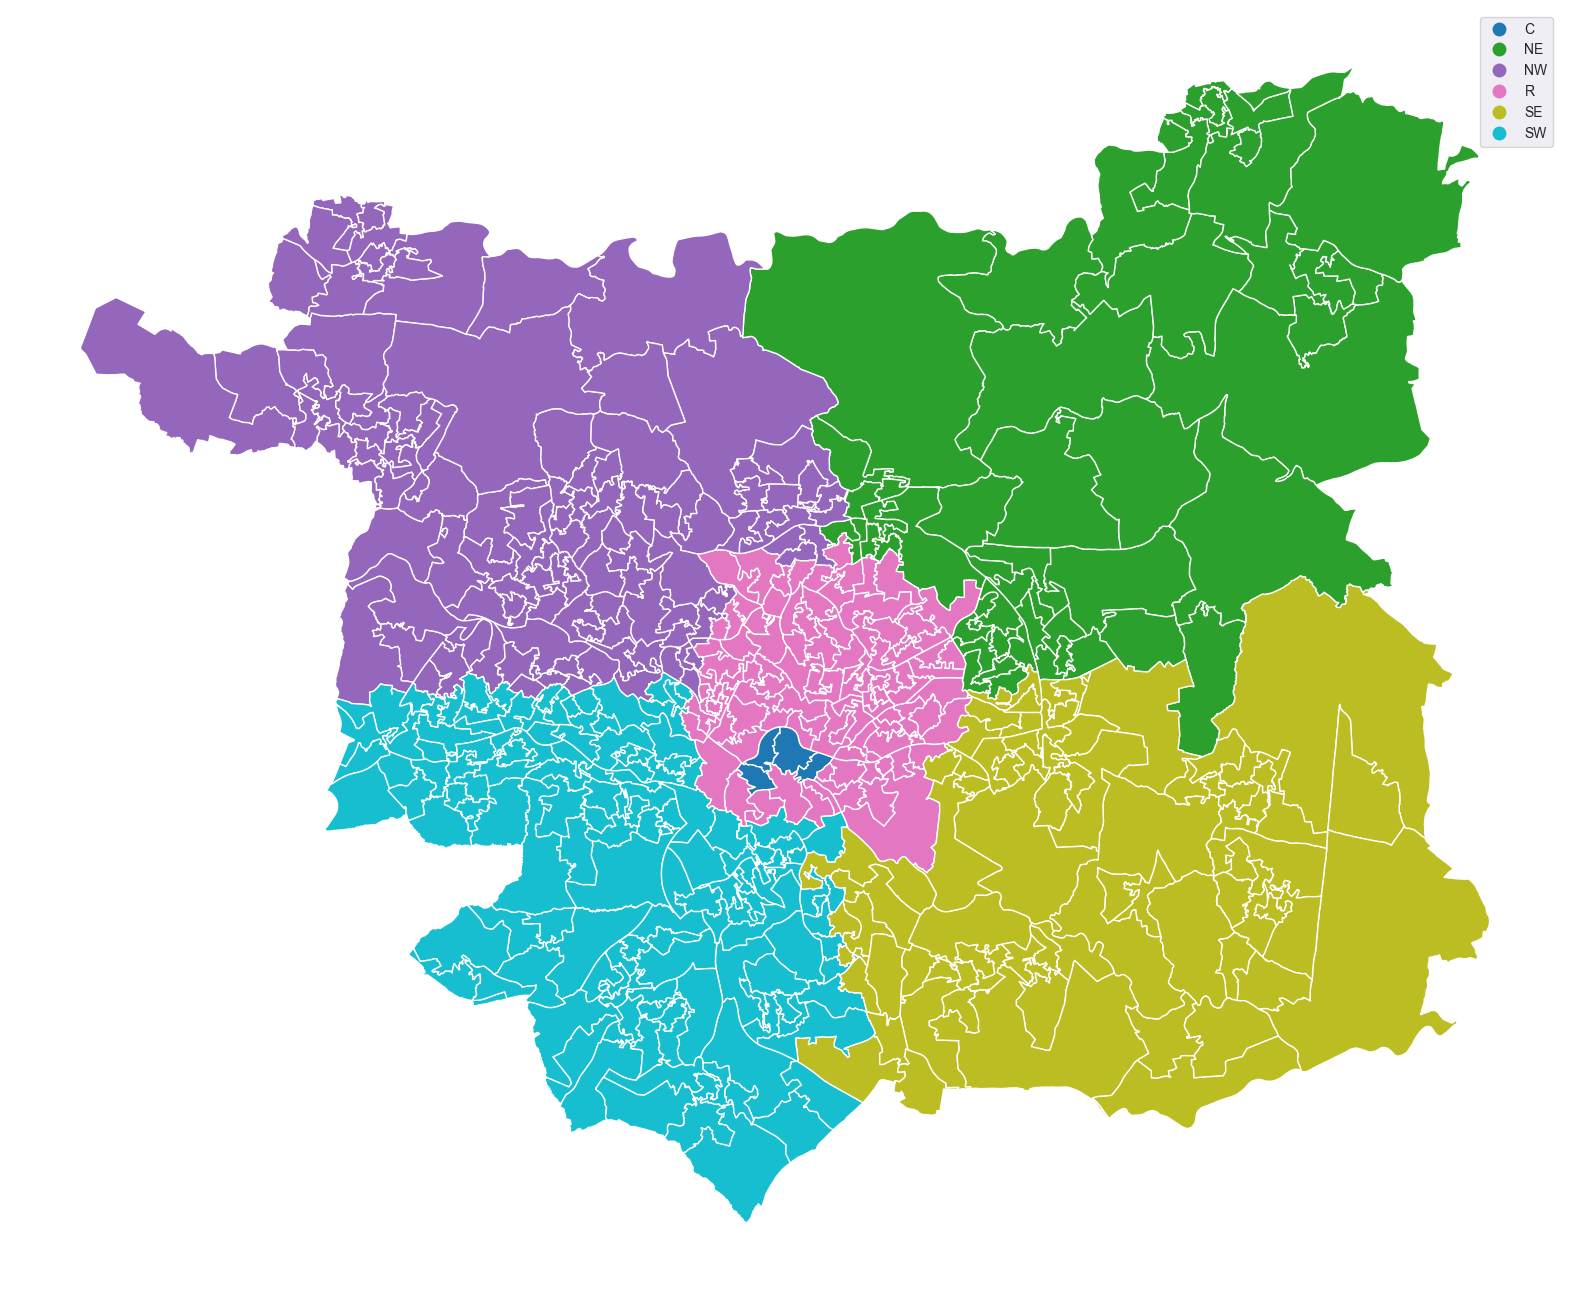

In [83]:
#Plotting regions of Leeds
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

zone_df.plot(ax=ax, column="Region", legend=True)
ax.set_axis_off()

### 2. Data exploration: discover and visualise mobility patterns. [3 pnt]
#### 2.1 For each zone, count the number of times that zone is a destination (hint: use the pandas *groupby* method). Create a visualisation showing the statistical distribution of these counts, using a histogram. What can you say about this distribution?

In [166]:
dest_count = mode_df['Destination_lsoa_name'].value_counts()
dest_count.rename("destinations", inplace=True)
dest_count.head(10)

Leeds 111B    946
Leeds 063E    391
Leeds 111A    301
Leeds 055H    198
Leeds 111E    192
Leeds 063B    139
Leeds 111C    105
Leeds 093D     84
Leeds 034C     73
Leeds 110D     58
Name: destinations, dtype: int64

In [167]:
#Count all destinations, and add them to all zones.
#Fills NA's with 0's
zones_merged = pd.merge(left=zone_df, right=dest_count, left_on="LSOA11NM", right_index=True, how="left")

noDest = zones_merged.isna().sum().sum()
zones_merged['destinations'].fillna(0, inplace=True)

zones_merged.head(50)

,LSOA11CD,LSOA11NM,Region,geometry,destinations
0,E01011466,Leeds 094A,SW,"MULTIPOLYGON (((-169221.389 7124159.332, -1692...",0.0
1,E01011467,Leeds 112A,SW,"MULTIPOLYGON (((-169723.032 7129853.761, -1696...",47.0
2,E01011468,Leeds 112B,SE,"MULTIPOLYGON (((-168495.874 7128352.169, -1683...",35.0
3,E01011469,Leeds 094B,SE,"MULTIPOLYGON (((-168806.358 7126652.980, -1687...",0.0
4,E01011470,Leeds 112C,SE,"MULTIPOLYGON (((-168071.065 7127724.677, -1679...",13.0
5,E01011471,Leeds 092A,SW,"MULTIPOLYGON (((-170855.103 7127672.325, -1708...",0.0
6,E01011472,Leeds 092B,SW,"MULTIPOLYGON (((-170242.159 7127357.602, -1702...",2.0
7,E01011473,Leeds 092C,SW,"MULTIPOLYGON (((-170273.014 7126293.807, -1702...",1.0
8,E01011474,Leeds 092D,SE,"MULTIPOLYGON (((-169663.939 7126205.102, -1696...",0.0
9,E01011475,Leeds 094C,SW,"MULTIPOLYGON (((-169770.580 7124913.751, -1697...",8.0


In total, 64 zones of all 482 zones have no trip destinations.


Text(0.5, 1.0, 'Boxplot of destinations ending in a specific zone')

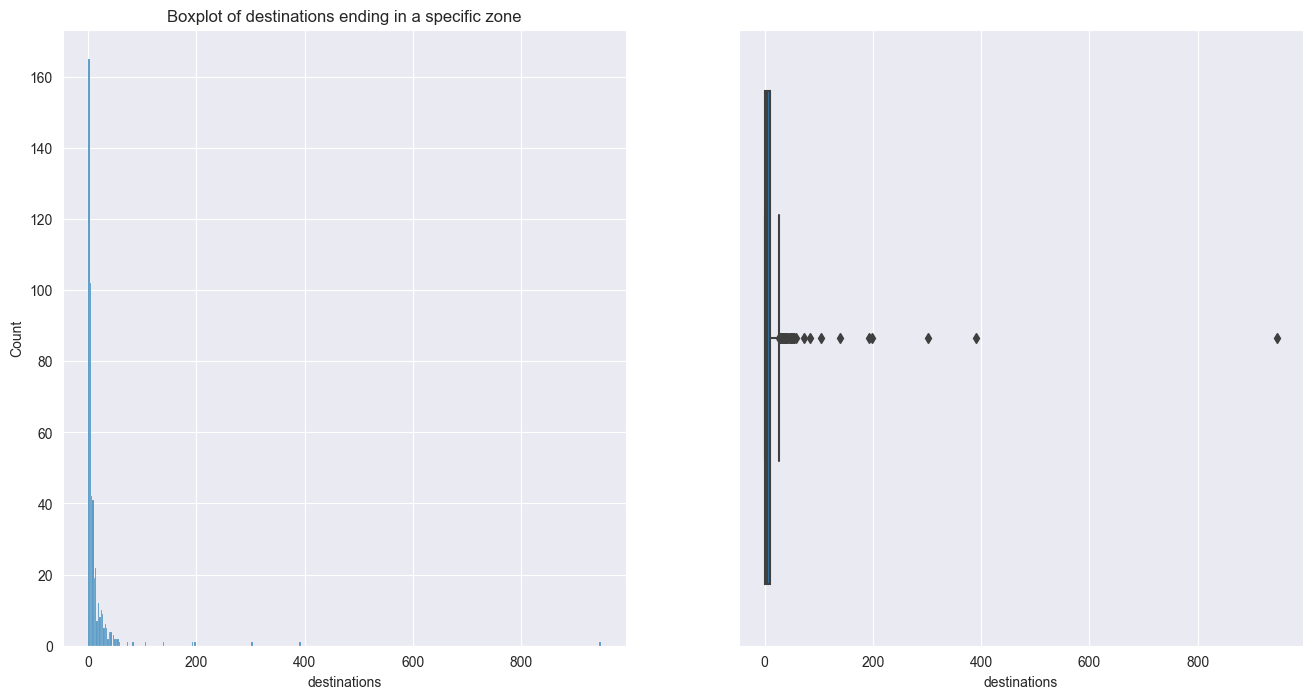

In [171]:
#Plots

print(f"In total, {noDest} zones of all {len(zone_df)} zones have no trip destinations.")

fig, ax = plt.subplots(1, 2, figsize = (16, 8))
sns.histplot(zones_merged, x="destinations", ax= ax[0])
sns.boxplot(zones_merged, x="destinations", ax= ax[1])
ax[0].set_title("Histogram plot of destinations ending in a specific zone")
ax[0].set_title("Boxplot of destinations ending in a specific zone")

### Interpretation of results
There is a high variability in zone destination, some trips end up a lot in a specific destination, such as zone `Leeds 111B` with 946 destinations, but there are also 64 zones that have 0 destinations in them. So overall it is quite centered around 0, with most zones having low visit rate whilst there are some outlier zones that are popular having a lot of destinations.

#### 2.2 Create a visualisation showing the *spatial* distribution of these counts. To do so, merge this count dataframe with the geographic delination of zones.

Text(0.5, 1.0, 'Spacial plot of destinations in zones in Leeds')

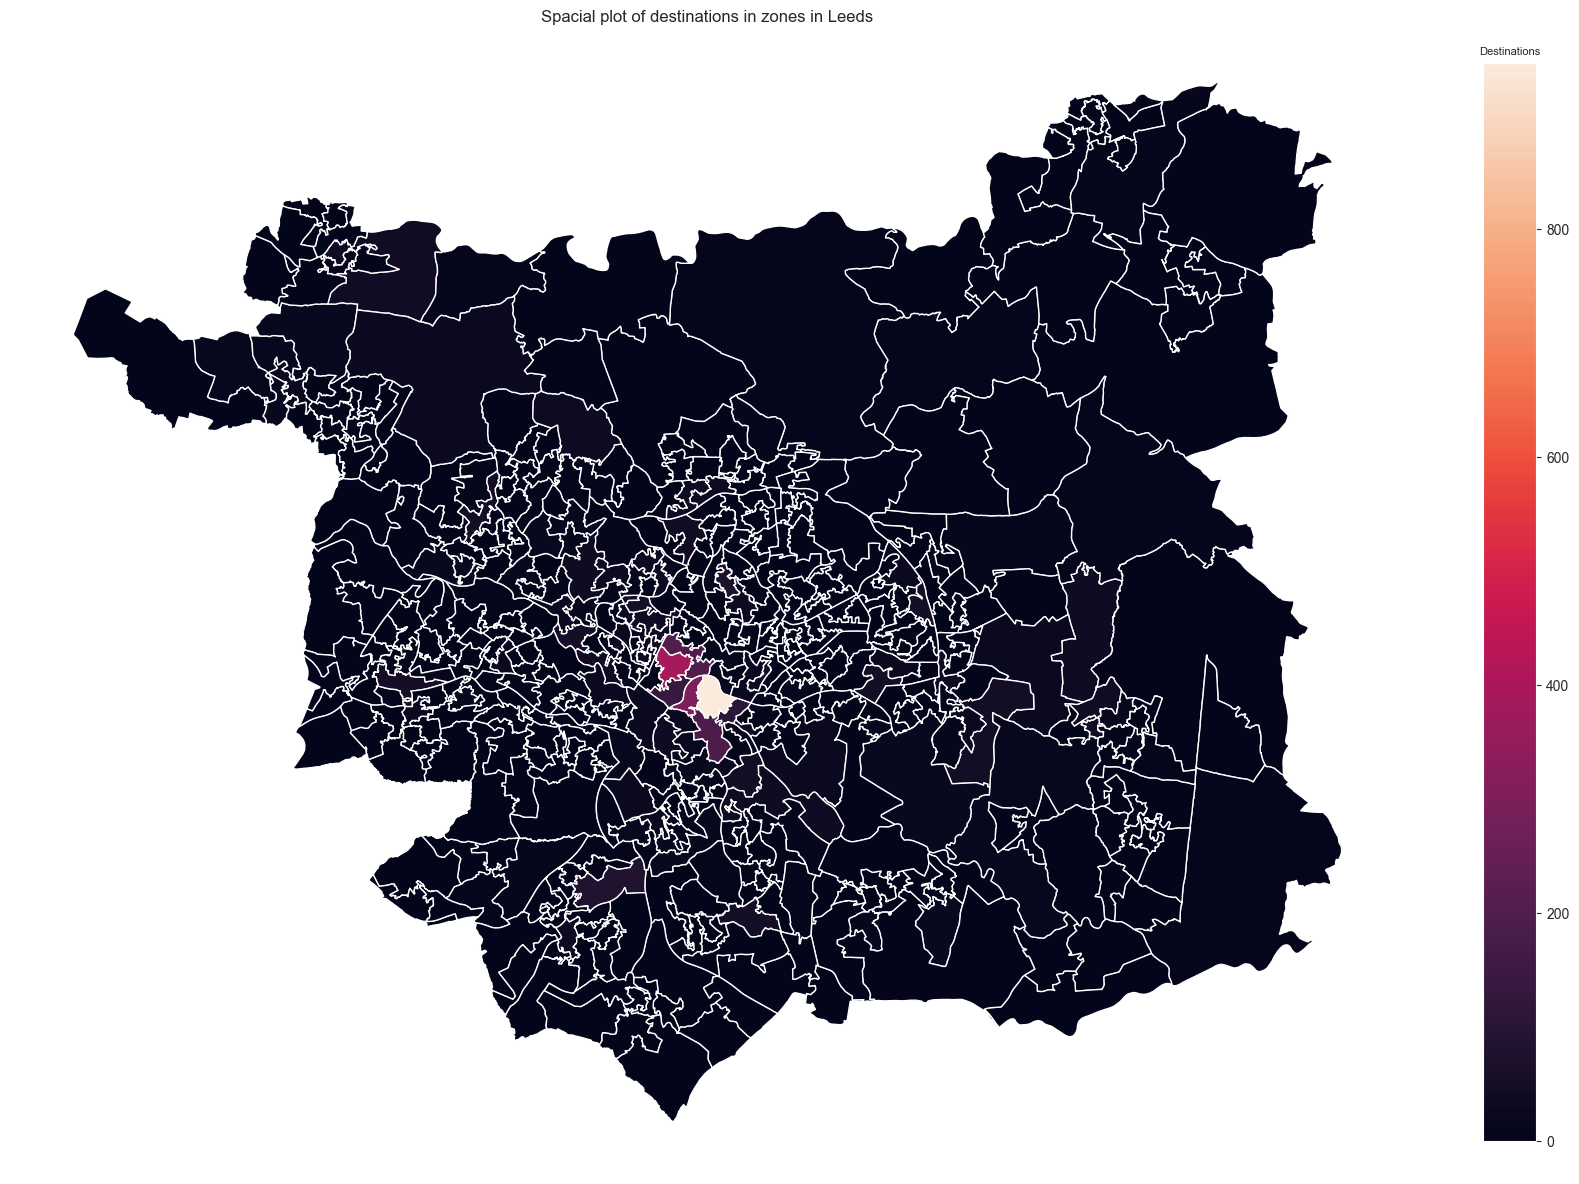

In [442]:
fig, ax = plt.subplots(1, 1, figsize = (20,20))
zones_merged.plot(ax=ax, column="destinations", cmap="rocket")

ax.set_axis_off()

#Add colorbars
patch_col = ax.collections[0]
cb1 = fig.colorbar(patch_col, ax=ax, shrink=0.7 , fraction=0.05)
cb1.ax.set_title('Destinations',fontsize=8)
ax.set_title("Spacial plot of destinations in zones in Leeds")


#### Interpretation of results
There are a lot of trips ending in the city centre, since that contains a darker area which indicates a higher destinations count. Outside of the city centre, the destination count seems quite low overall, lying between 0-100 destination per zone.

#### 2.3. Create a figure with 2 subplots showing the mode share of 'Car' (left) and of 'Bus' (right) in every destination zone in regions R and C, and interpret the results.<br> For your convenience, we have preprocessed the data for you. That is, we have added mode shares per destination zone. (Use the same color scale for the two maps)

In [200]:
mode_zone_df.head()

,dest_zone,LSOA11NM,Region,car,bus,rail,taxi,cycling,walking,geometry
0,E01011466,Leeds 094A,SW,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"MULTIPOLYGON (((-169221.389 7124159.332, -1692..."
1,E01011467,Leeds 112A,SW,0.744681,0.106383,0.0,0.0,0.127660,0.021277,"MULTIPOLYGON (((-169723.032 7129853.761, -1696..."
2,E01011468,Leeds 112B,SE,0.868421,0.026316,0.0,0.0,0.078947,0.026316,"MULTIPOLYGON (((-168495.874 7128352.169, -1683..."
3,E01011469,Leeds 094B,SE,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"MULTIPOLYGON (((-168806.358 7126652.980, -1687..."
4,E01011470,Leeds 112C,SE,0.707317,0.048780,0.0,0.0,0.000000,0.243902,"MULTIPOLYGON (((-168071.065 7127724.677, -1679..."


Text(0.5, 1.0, 'Bus share of zones in C and R regions of Leeds')

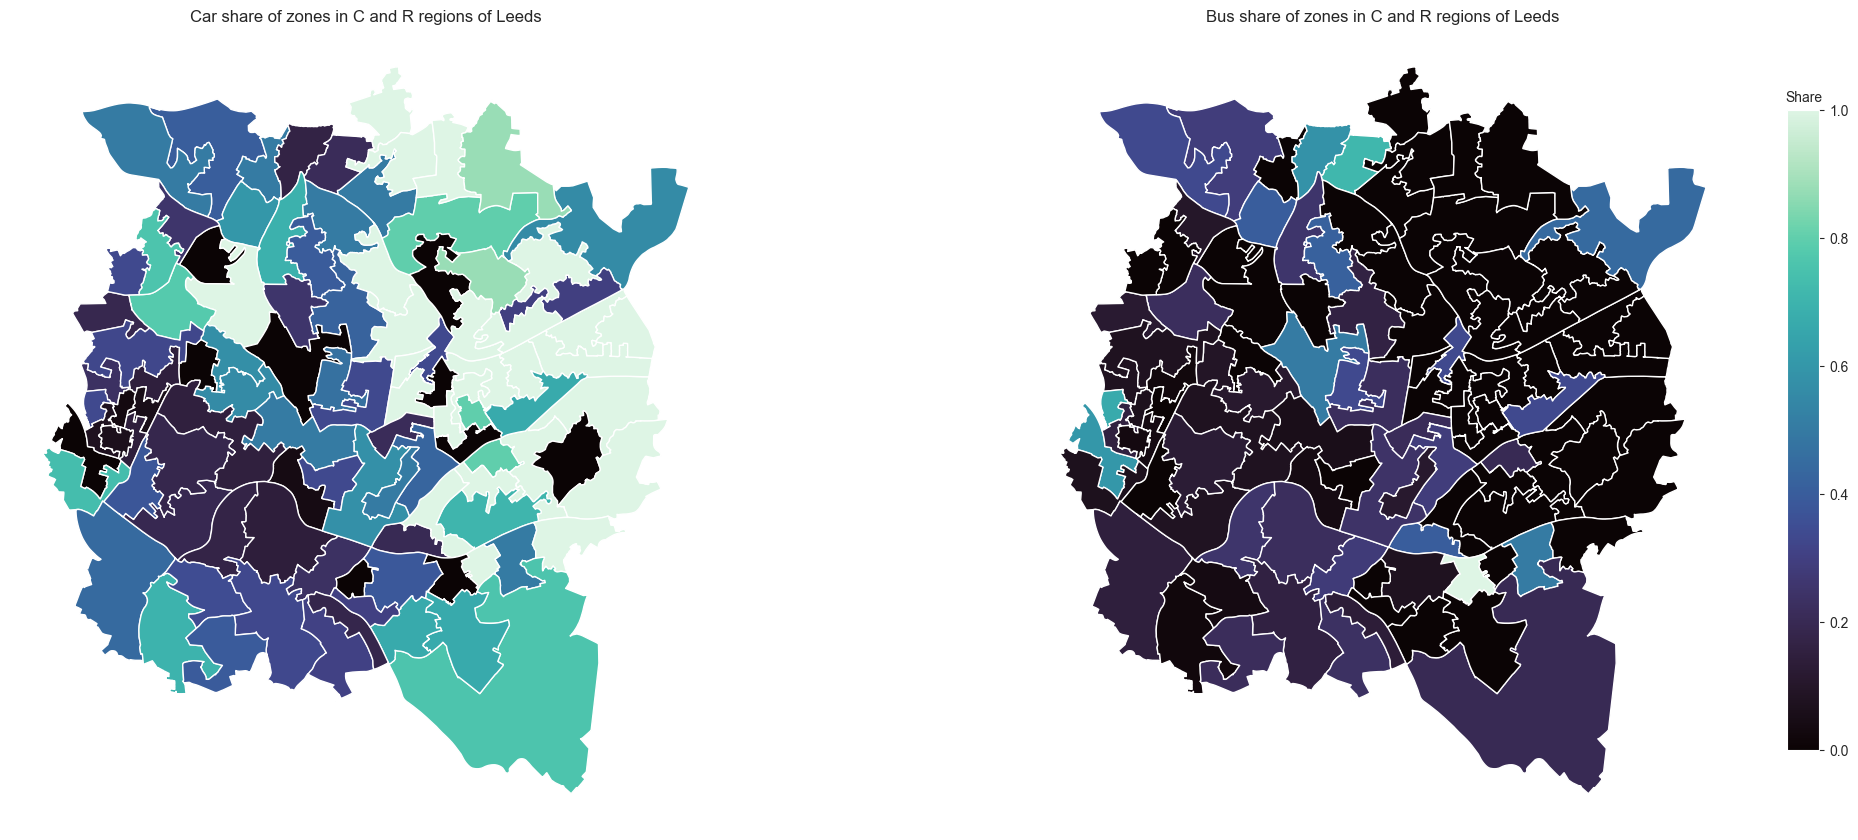

In [441]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
vMin, vMax = 0, 1

fig.tight_layout(pad=0.0)
plt.subplots_adjust(wspace=0.0, hspace=0.4, bottom=0.1, top=0.9)
plt.subplots_adjust(hspace=0.0)
[x.set_axis_off() for x in ax.ravel()]

mode_zone_df[(mode_zone_df.Region == 'R') | (mode_zone_df.Region == 'C')].plot(ax = ax[0], column='car', vmin = vMin, vmax = vMax, cmap='mako')
mode_zone_df[(mode_zone_df.Region == 'R') | (mode_zone_df.Region == 'C')].plot(ax = ax[1], column='bus', vmin = vMin, vmax = vMax, cmap='mako')

#Add colorbars
patch_col = ax[0].collections[0]
cb1 = fig.colorbar(patch_col, ax=ax[1], shrink=0.8 , fraction=0.05)
cb1.ax.set_title('Share',fontsize=10)


ax[0].set_title("Car share of zones in C and R regions of Leeds")
ax[1].set_title("Bus share of zones in C and R regions of Leeds")



#### Interpretation of results
In general, there is a much higher car share than bus share in these regions of Leeds. Especially in the east region, where cars dominate the with high shares of around 1. In the east / west side, car and bus shares are about equal with shares of 0.1 - 0.3. There is also one zone in Leeds with a high bus share of 1, this is zone `Leeds 075B` and seems to be a bus only zone.

In [221]:
#The one Leeds zone with full bus share
mode_zone_df[((mode_zone_df.Region == 'R') | (mode_zone_df.Region == 'C')) & (mode_zone_df.bus > 0.9)]

,dest_zone,LSOA11NM,Region,car,bus,rail,taxi,cycling,walking,geometry
361,E01011623,Leeds 075B,R,0.0,1.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-168264.431 7131908.046, -1682..."


### 3. Model training: Train a MultiLayerPerceptron (MLP) neural network to predict the choices [3 pnt]

#### 3.1. Use the *numerical travel features* (see notes above) and the following two categorical features: purpose and destination regions. Remember: (1) to scale all variables appropriately before training your MLP, and (2) to encode categorical variables.  (hint: use the pandas **get_dummies** method to encode the categorical variables)

In [249]:
#Add destination region to
mode_renamed = mode_df.rename(columns={"Destination_lsoa_name" : "LSOA11NM"})
region_df = pd.merge(left=mode_renamed, right=zone_df[['LSOA11NM', 'Region']], on="LSOA11NM", how="left")

#Subselect all numerical features
numerical_df = region_df[['total_car_cost', 'taxi_cost', 'bus_cost_total_per_leg', 'rail_cost_total_per_leg', 'car_distance_km', 'bus_distance_km', 'rail_distance_km', 'taxi_distance_km','cycling_distance_km', 'walking_distance_km', 'car_travel_time_min', 'bus_travel_time_min', 'rail_travel_time_min', 'taxi_travel_time_min', 'cycling_travel_time_min', 'walking_travel_time_min', 'bus_IVT_time_min', 'bus_access_egress_time_min', 'rail_IVT_time_min', 'rail_access_egress_time_min', 'bus_transfers', 'rail_transfers', ]]

#Subselect all categorical features
categorical_df = region_df[['avail_car', 'avail_taxi', 'avail_bus', 'avail_rail', 'avail_cycling', 'avail_walking','purpose', 'Region']]


#Scale them appropriately where mean is around 0 for the MLP
# Initiate scaler object & fit to data
scaler = StandardScaler()
scaler.fit(numerical_df)

# Create new dataframe X_scaled containg the scaled features
X_numerical = scaler.transform(numerical_df)

#Encode categorical variables using dummies
X_categorical = pd.get_dummies(categorical_df, columns = ['Region', 'purpose'])

#Concat numerical and categorical
X = np.concatenate((X_numerical, X_categorical), axis= 1)
y = mode_df['choice'] - 1

#Some assertions to check if everything went correct
assert X.shape == (X_categorical.shape[0], X_categorical.shape[1] + X_numerical.shape[1])
assert y.shape[0] == X.shape[0]



#### 3.2 Tune the hyperparameters of your MLP. That is, do a gridsearch over the following hyperparameter space:
        - Architecture: {1 HL w/30 nodes, 2 HL w/ 5 nodes}
        - Alpha parameter: {0.1, 0.001}
        - Learning rate: {0.01, 0.001}

In [252]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

#We use a 70% - 30% train/test split and dont apply hyperparameter tuning on the test data!
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12345, test_size = 0.3)

parameters = {'hidden_layer_sizes':[(30), (5, 5)],
              'alpha': [0.1, 0.001],
              'learning_rate_init':[0.01, 0.001]}
mlp = MLPClassifier()
clf = GridSearchCV(mlp, parameters, cv=5)
clf.fit(X_train, y_train)

best = clf.best_estimator_

C:\Users\hugod\Anaconda3\envs\tpmML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\hugod\Anaconda3\envs\tpmML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\hugod\Anaconda3\envs\tpmML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\hugod\Anaconda3\envs\tpmML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users

#### 3.3 Fit a MLP model, using the optimal hyperparameters found and report and interpret the following output metrics:
        - Accuracy
        - Cross-entropy
        - Confusion matrix

In [254]:
#Train best
best.fit(X_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=30, learning_rate_init=0.01)

In [256]:
#Report metrics on test set
# Let's create a function that returns the accuracy and the cross entropy, for the train and test data sets
def calculate_acc_ce(mlp,X_train,Y_train,X_test, Y_test):
    def calculate_acc(mlp,X,Y):
        accuracy = mlp.score(X,Y)
        return accuracy

    def calculate_ce(mlp,X,Y):
        # Compute cross entropy
        # Use the model object to predict probabilities per class
        prob = mlp.predict_proba(X)

        # Multiply the probabilities with Y (0/1 array), and sum along the row axis to obtain the predicted probability of the target
        Y_dummy = pd.get_dummies(Y).to_numpy()
        prob_chosen = np.sum(prob*Y_dummy,axis=1)

        # Take the logarithm
        log_prob_chosen = np.log(prob_chosen)

        # Compute the cross entropy
        cross_entropy = -np.sum(log_prob_chosen)/len(Y)
        return cross_entropy

    # Compute the accuracy
    acc_train = calculate_acc(mlp,X_train,Y_train)
    acc_test  = calculate_acc(mlp,X_test,Y_test)

    # Apply cross entropy function
    ce_train = calculate_ce(mlp,X_train,Y_train)
    ce_test = calculate_ce(mlp,X_test,Y_test)
    return acc_train, acc_test, ce_train, ce_test

Text(0.5, 1.0, 'Cross entropy loss on the TRAINING DATA. \nBest CE = 0.277')

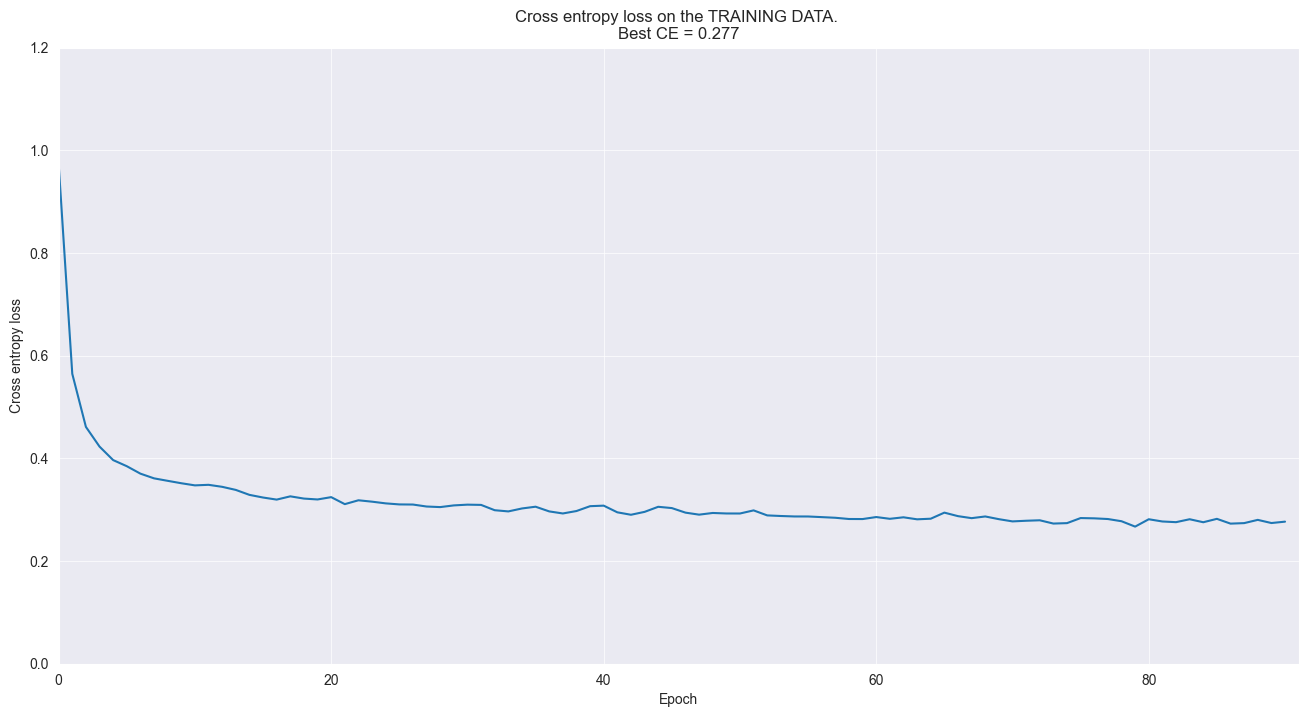

In [277]:
#Print learning curve on training data
fig, ax = plt.subplots(figsize = (16,8))
plt.plot(best.loss_curve_)
ax.set_xlabel('Epoch')
ax.set_ylabel('Cross entropy loss')
ax.grid(True,linewidth = 0.5)
ax.set_ylim(0.0,1.2)
ax.set_xlim(0,best.n_iter_)
ax.set_title(f'Cross entropy loss on the TRAINING DATA. \nBest CE = {best.loss_:4.3f}')

#### Accuracy and cross-entropy

In [281]:
# Apply our evaluation function
accuracy_train, accuracy_test, cross_entropy_train, cross_entropy_test = calculate_acc_ce(best,X_train,y_train,X_test, y_test)

acc = "Accuracy"
ce = "Cross Entropy"
# Print the results
print(f'{"":13}  Train set \t Test set')
print(f'{acc:15} {accuracy_train:.3f}\t\t {accuracy_test:0.3f}')
print(f'{ce:15} {cross_entropy_train:0.3f}\t\t {cross_entropy_test:0.3f}')

               Train set 	 Test set
Accuracy        0.931		 0.883
Cross Entropy   0.205		 0.366


#### Confusion matrix

Text(0.5, 1.0, 'Confusion matrix on the test set')

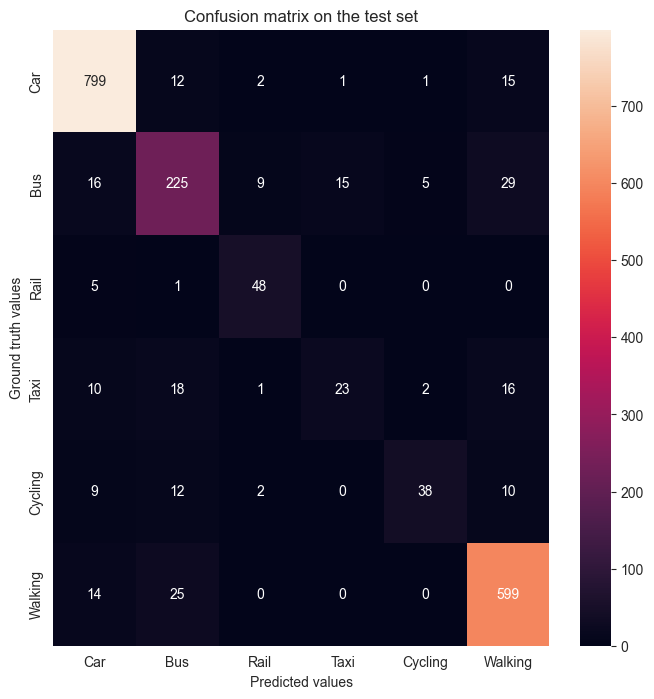

In [301]:
from sklearn.metrics import confusion_matrix
y_pred = best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

choices = {0: "Car", 1: "Bus", 2:"Rail", 3: "Taxi", 4: "Cycling", 5: "Walking"}
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.heatmap(cm, annot=True, ax = ax, fmt="", cmap="rocket")


ax.set_xticklabels(choices.values())
ax.set_yticklabels(choices.values())
ax.set_ylabel("Ground truth values")
ax.set_xlabel("Predicted values")
ax.set_title("Confusion matrix on the test set")

#### Interpretation of results
The model performs quite well in general with an accuracy of 0.883 on the test set. When taking a look at the confusion matrix, we can observe that it was able to predict every class quite well, even the less frequently occurring classes such as, Rail, Taxi and Cycling. The largest part of errors came from confusion between Bus and Walking class. There were 25 false predictions where the model predicted the choice was a Bus, whie the choice was to Walk and vice versa the model also predicted 29 choices to be Walking while it was taking the Bus.

### 4.Assess the impact of a car ban policy on mode shares [3 pnt]
#### 4.1. Benchmark scenario: create a new dataframe containing only trips with a destination in region C. Predict the mode shares for these trips, using your trained model. Use the *predict_proba* function from sk-learn (why should you NOT use the *predict* function in this case?)

In [353]:
#This function preprocesses dataframes for predicting choices only containing region C
def processingPredict(df, scaler, carZero = False):

    #Subselect all numerical features
    num = df[['total_car_cost', 'taxi_cost', 'bus_cost_total_per_leg', 'rail_cost_total_per_leg', 'car_distance_km', 'bus_distance_km', 'rail_distance_km', 'taxi_distance_km','cycling_distance_km', 'walking_distance_km', 'car_travel_time_min', 'bus_travel_time_min', 'rail_travel_time_min', 'taxi_travel_time_min', 'cycling_travel_time_min', 'walking_travel_time_min', 'bus_IVT_time_min', 'bus_access_egress_time_min', 'rail_IVT_time_min', 'rail_access_egress_time_min', 'bus_transfers', 'rail_transfers', ]]

    #Subselect all categorical features
    cat = df[['avail_car', 'avail_taxi', 'avail_bus', 'avail_rail', 'avail_cycling', 'avail_walking','purpose', 'Region']]


    #Scale them appropriately where mean is around 0 for the MLP
    # Initiate scaler object & fit to data
    scaler.fit(num)

    # Create new dataframe X_scaled containg the scaled features
    X_num = scaler.transform(num)

    #Encode categorical variables using dummies
    X_cat = pd.get_dummies(cat, columns = ['Region', 'purpose'])

    #Filter now on only Region C
    X_cat = X_cat[X_cat.Region_C == 1]
    indexes = X_cat.index.values

    #Get correct numerical part
    X_num = X_num[indexes]


    if carZero:
        X_cat['avail_car'] = 0

    #Concat numerical and categorical
    X = np.concatenate((X_num, X_cat), axis= 1)
    y = df.iloc[indexes]['choice'] - 1

    return X, y

In [357]:
#Get city centre trips
X_city, y_city = processingPredict(region_df, scaler)

y_car_pred = best.predict_proba(X_city)

#### 4.2. Car-ban scenario: in the dataset created in 4.1 set *avail_car* to zero. Use your trained model to predict the modes. (**Remember to scale the data with the scaler created for training the model**).


In [356]:
#Get city centre trips
y_no_car_pred = best.predict_proba(processingPredict(region_df, scaler, carZero=True)[0])

#### 4.3. Compare your results. That is, analyse how mode shares have changed as a result of the car-ban policy. Create a visualisation representing the shift in mode shares. By which mode have car trips most often been substituted?

In [420]:
#Get average of mode shares over all trips in region C with cars
mode_avg = np.mean(y_car_pred, axis=0)

#Get average of mode shares over all trips in region C without cars
mode_no_car_avg = np.mean(y_no_car_pred, axis=0)

#Get true current avg mode shift in region C
mode_true = mode_zone_df[mode_zone_df.Region == 'C'].mean().values

shift_dict = {"Choice": choices.values(), "Truth": mode_true, "Predict" : mode_avg, "Predict - Car-ban" : mode_no_car_avg}

shift_df = pd.DataFrame.from_dict(shift_dict)

#Check largest mode increase
shift_df['Increase'] = (shift_df['Predict - Car-ban'] - shift_df['Predict']) / (shift_df['Predict']) * 100
shift_df.nlargest(6, columns='Increase')

C:\Users\hugod\Anaconda3\envs\tpmML\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Choice,Truth,Predict,Predict - Car-ban,Increase
3,Taxi,0.068458,0.034309,0.054721,59.494001
2,Rail,0.066661,0.053455,0.084706,58.461798
1,Bus,0.198748,0.250641,0.319508,27.476207
4,Cycling,0.016538,0.021402,0.024947,16.566934
5,Walking,0.427317,0.495780,0.515812,4.040625
0,Car,0.222278,0.144413,0.000306,-99.788403


Text(0.5, 1.0, 'Mode percentage increase after introducting car-ban')

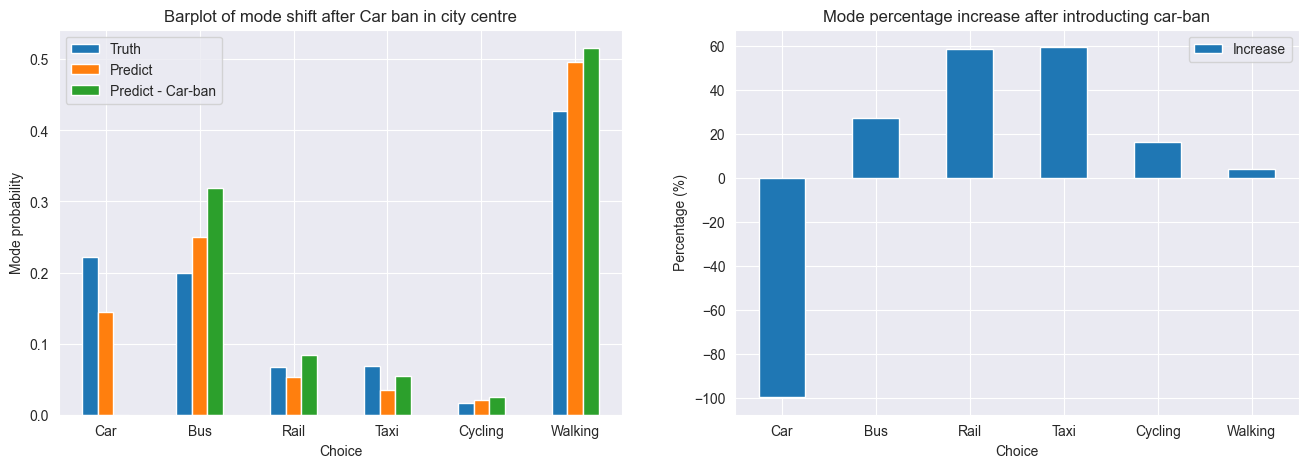

In [440]:
#Plot change of shift after car-ban
fig, ax = plt.subplots(1,2, figsize=(16, 5), sharex=True)
shift_df.plot.bar(x = 'Choice', y = ["Truth", 'Predict', 'Predict - Car-ban'],ax= ax[0])
shift_df.plot.bar(x = 'Choice', y = 'Increase',ax= ax[1])

ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=0)
ax[0].set_ylabel("Mode probability")
ax[0].set_title("Barplot of mode shift after Car ban in city centre")

ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=0)
ax[1].set_ylabel("Percentage (%)")
ax[1].set_title("Mode percentage increase after introducting car-ban")

#### Interpretation of results
It is evident that setting the `avail_cars` feature to 0, that is done in the Car-ban policy, results in almost 0 predictions of using car as transportation mode. The largest absolute increase is the bus transportation, gaining an overall 7% of the total mode share. The largest percentage increase is for Rail and Taxi, both increasing shares with around 60%. Walking only gained a relative 4% increase which makes sense since most of the time walking is not a suitable option for travel when you want to go somewhere with the car (distance is too large for walking).

#### 4.3.Reflect on your analysis: <br> 
`A` Do you think your analysis and results are meaningful? Why/why not? <br> 
`B` What are the main limitations of your analysis?

Yes, overall the model does a great job at predicting travel choices with accuracy of around 90% on unseen data. Also having prediction probabilities makes it useful for predicting how the mode share changes when there are no available cars anymore in the city centre.

There are also some limitations: Currently, we only included trips that have an end destination inside the city centre, but it is also possible that trips pass through different regions in the city of Leeds or that a trip starts in the city centre and ends outside the city centre. It would be better to also include those scenarios in terms of data and add those to the modelling. Secondly, since the model is an MLP, the network behaves as a black box and so it is impossible to explain the reasoning behind the models' predictions which would be preferred in a real-life setting.